## Final Project Submission

Please fill out:
* Student name: Peter Kimani
* Student pace: full time
* Instructor name: Mwikali



# Analysis of Aircraft incidents and crashes from 1962-2023
 In this notebook we will explore a file containing data from NTSB: Aviation_Data. This file contains logs of varying aircraft incidents and crashes from the year 1962 to 2023. Using this data we will assess the risk and determine the viability of several aircraft based on the findings

In [48]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Exploratory Data Analysis of the contents of Aviation Data

In [49]:
df = pd.read_csv('data/Aviation_data.csv')  # Reads Aviation_data and copies it to variable df

print(df.shape)
df.head()                                   # Displays first 5 rows

(90348, 31)


c:\Users\Peter Kimani\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [50]:
df.columns 


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [51]:
df.info() #display the type of data in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [52]:
df['Purpose.of.flight'].value_counts() 

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [53]:
df['Aircraft.Category'].value_counts()


Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [54]:
df['Injury.Severity'].value_counts(normalize=True)*100 #displays injury severity as a percentage

Non-Fatal     76.638715
Fatal(1)       7.016805
Fatal          5.987097
Fatal(2)       4.222371
Incident       2.524776
                ...    
Fatal(45)      0.001138
Fatal(111)     0.001138
Fatal(33)      0.001138
Fatal(83)      0.001138
Fatal(107)     0.001138
Name: Injury.Severity, Length: 109, dtype: float64

#### Combine Make and Model to differenciate models from the same manufacturer

In [55]:
#new dataframe to investigate which make and model has the most accidents
make_model = df['Make'] + ' ' +  df['Model'] 
make_model.value_counts()

Cessna 152                          2168
Cessna 172                          1254
Cessna 172N                          996
Piper PA-28-140                      812
Cessna 150                           716
                                    ... 
Piper PA18A-150                        1
Grob G103 Twin Astir                   1
Hawker Beechcraft Corp. 99             1
AMERICAN EUROCOPTER CORP AS350B2       1
Aeronca AC7B                           1
Length: 20130, dtype: int64

## Data Cleaning

### Find out and delete the columns with the most missing values that are not useful in the assessment

In [56]:
df.isna().sum().sort_values(ascending = False) #shows the total number of missing values per column


Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40099
Airport.Name              37558
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8536
Report.Status              7840
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2776
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: i

### Drop columns with numerous missing rows and those that are not relevant

In [57]:
#using new dataframe to have a reference point at this stage
df_clean = df.drop(['Schedule','Air.carrier','FAR.Description','Longitude','Accident.Number',
'Latitude','Airport.Code','Airport.Name','Registration.Number','Amateur.Built','Injury.Severity'],axis=1)

df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [58]:
df_clean.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Delete duplicates

In [59]:
df_clean.duplicated().sort_values(ascending=False)


83872     True
86122     True
84971     True
82894     True
86119     True
         ...  
59304    False
59305    False
59306    False
59307    False
0        False
Length: 90348, dtype: bool

In [60]:
df_clean = df_clean.drop_duplicates(keep='first',ignore_index=True)

### Dealing with wrong formats

In [61]:
df_clean['Make'] = df_clean['Make'].str.title()

In [62]:
df_clean['Location'] = df_clean['Location'].str.upper()

In [63]:
df_clean['Location'].value_counts()


ANCHORAGE, AK                        548
MIAMI, FL                            275
HOUSTON, TX                          270
ALBUQUERQUE, NM                      265
CHICAGO, IL                          256
                                    ... 
HARDY REEF, QUEENSLAND, AUSTRALIA      1
FREETOWN, SIERRA LEONE                 1
NEAR NOME, AK                          1
MANAGUA, NICARAGUA                     1
CREEL, MEXICO                          1
Name: Location, Length: 21978, dtype: int64

### Fill null values for numeric values

In [65]:
df_clean.select_dtypes(include=float)

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,1.0,2.0,0.0,0.0,0.0
1,1.0,4.0,0.0,0.0,0.0
2,1.0,3.0,NaN,NaN,NaN
3,1.0,2.0,0.0,0.0,0.0
4,NaN,1.0,2.0,NaN,0.0
...,...,...,...,...,...
88925,NaN,0.0,1.0,0.0,0.0
88926,NaN,0.0,0.0,0.0,0.0
88927,1.0,0.0,0.0,0.0,1.0
88928,NaN,0.0,0.0,0.0,0.0


In [19]:
df_clean.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82780.000000,77463.000000,76358.000000,76935.000000,82953.000000
mean,1.146545,0.647767,0.279866,0.357029,5.317782
std,0.446503,5.486794,1.544217,2.235792,27.890294
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


##### All the values from the keys are integers, using the median or mode provides a more precise value for imputation than the mean

In [20]:
print(df_clean['Total.Fatal.Injuries'].mode())
print(df_clean['Total.Fatal.Injuries'].median())

0    0.0
dtype: float64
0.0


In [21]:
# median and mode are equal so either can be imputed
df_clean['Total.Fatal.Injuries'] = df_clean['Total.Fatal.Injuries'].fillna(df_clean['Total.Fatal.Injuries'].median())



In [22]:
print(df_clean['Total.Serious.Injuries'].mode())
print(df_clean['Total.Serious.Injuries'].median())

0    0.0
dtype: float64
0.0


In [23]:
# median and mode are equal so either can be imputed
df_clean['Total.Serious.Injuries'] = df_clean['Total.Serious.Injuries'].fillna(df_clean['Total.Serious.Injuries'].median())



In [24]:
print(df_clean['Total.Minor.Injuries'].mode())
print(df_clean['Total.Minor.Injuries'].median())

0    0.0
dtype: float64
0.0


In [25]:
# median and mode are equal so either can be imputed
df_clean['Total.Minor.Injuries'] = df_clean['Total.Minor.Injuries'].fillna(df_clean['Total.Minor.Injuries'].median())



In [26]:
print(df_clean['Total.Uninjured'].mode())
print(df_clean['Total.Uninjured'].median())

0    0.0
dtype: float64
1.0


#### There is a discrepancy here, using a visualisation might help inform a decision

Text(0.5, 1.0, 'Distribution of Total Uninjured Passengers per incident')

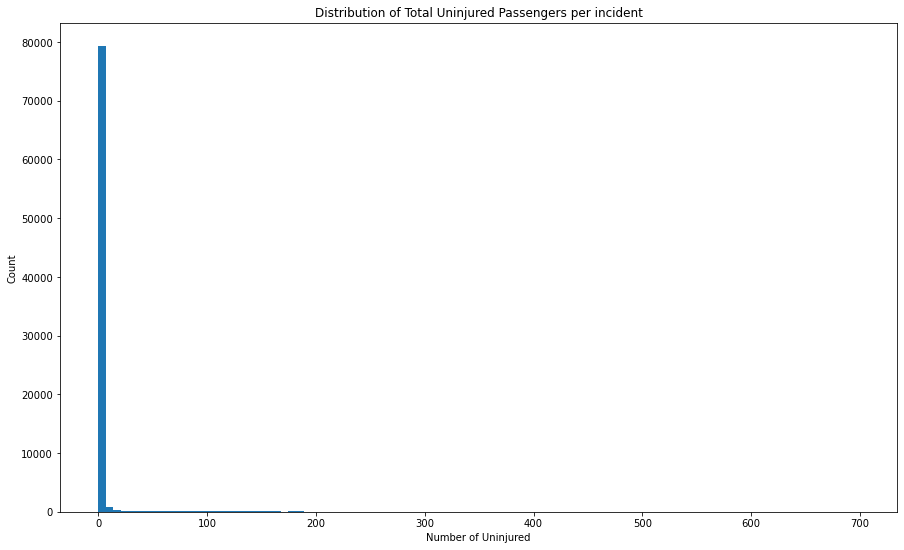

In [44]:
plt.figure(figsize=(15,9))
plt.hist(df['Total.Uninjured'],bins=100)
plt.ylabel("Count")
plt.xlabel("Number of Uninjured")
plt.title('Distribution of Total Uninjured Passengers per incident')


In [41]:
#Using the mode supports the trend of the data  
df_clean['Total.Uninjured'] = df_clean['Total.Uninjured'].fillna(df_clean['Total.Uninjured'].mode())


In [30]:
print(df_clean['Number.of.Engines'].mode())
print(df_clean['Number.of.Engines'].median())

0    1.0
dtype: float64
1.0


In [31]:
# median and mode are equal so either can be imputed
df_clean['Number.of.Engines'] = df_clean['Number.of.Engines'].fillna(df_clean['Number.of.Engines'].median())



In [45]:
df_clean

,Event.Id,Investigation.Type,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,1974-08-30,"SALTVILLE, VA",United States,Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,1979-08-02,"CANTON, OH",United States,Destroyed,NaN,Cessna,501,1.0,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88925,20221227106491,Accident,2022-12-26,"ANNAPOLIS, MD",United States,NaN,NaN,Piper,PA-28-151,1.0,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88926,20221227106494,Accident,2022-12-26,"HAMPTON, NH",United States,NaN,NaN,Bellanca,7ECA,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88927,20221227106497,Accident,2022-12-26,"PAYSON, AZ",United States,Substantial,Airplane,American Champion Aircraft,8GCBC,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88928,20221227106498,Accident,2022-12-26,"MORGAN, UT",United States,NaN,NaN,Cessna,210N,1.0,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
